In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
df = pd.read_csv("all_rule_total.csv")

# Define the feature columns and target variable
feature_columns = ['System', 'Subsystem', 'Part Number', 
        'Parent', 'Responsible Engineer', 'Procurement Code', 'Sub Component Code', 'Variant']
target_column = 'IS VALID'

# Extract features and target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print(feature_importance_df.head())


Accuracy: 0.9532238442822385
                              Feature  Importance
10385           Procurement Code_Make    0.153759
10384            Procurement Code_Buy    0.080255
10388  Sub Component Code_DirectedBuy    0.039164
10391  Sub Component Code_SupplierBuy    0.035538
10386        Procurement Code_Phantom    0.031705


In [29]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9532238442822385


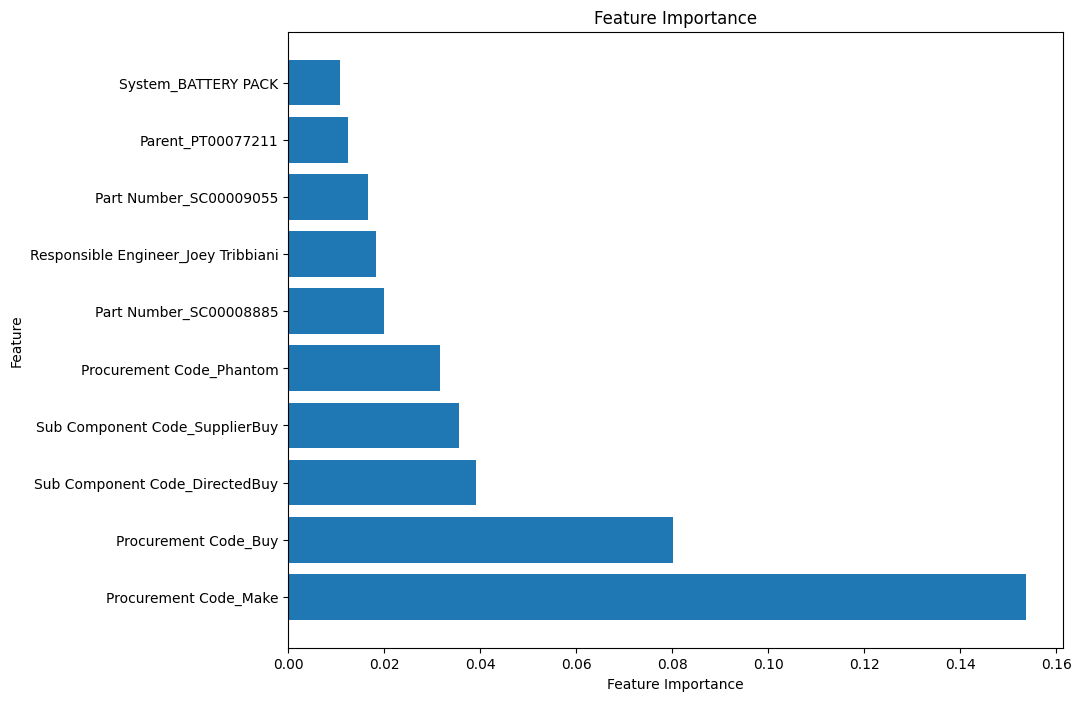

In [33]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df.head(10)['Feature'], feature_importance_df.head(10)['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [35]:
feature_importance_df.shape

(10511, 2)

In [41]:
system_battery_pack_column = X_encoded.iloc[:, 9]  # Assuming "System_Battery Pack" is at index 9

# Calculate the correlation coefficient between "System_Battery Pack" and "IS VALID"
correlation = system_battery_pack_column.corr(df['IS VALID'])

print("Correlation between System_Battery Pack and IS VALID:", correlation)

Correlation between System_Battery Pack and IS VALID: -0.002474181504367209


In [42]:
joey_tribbiani_column = X_encoded.iloc[:, 6]  # Assuming "System_Battery Pack" is at index 9

# Calculate the correlation coefficient between "System_Battery Pack" and "IS VALID"
correlation = joey_tribbiani_column.corr(df['IS VALID'])

print("Correlation between Joey Tribbiani and IS VALID:", correlation)

Correlation between Joey Tribbiani and IS VALID: -0.007376080657601568
